This notebook is to illustrate a strange phenomenon in the output of tree mortality in FATES. 

In [3]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Illustrate parameter file - made from 6 identical BETs. THe only parameter effecting background mortality should be bmort.  

In [6]:
pfile='/glade/u/home/rfisher/python_scripts/fates_6pft_BET_bugtest.nc'
params=xr.open_dataset(pfile)
print(params.fates_mort_bmort)

<xarray.DataArray 'fates_mort_bmort' (fates_pft: 6)>
array([0.014, 0.014, 0.014, 0.014, 0.014, 0.014])
Dimensions without coordinates: fates_pft
Attributes:
    units:      1/yr
    long_name:  background mortality rate


Reading in data from a run call 'testnextapi_f45_fates_bugtest'

In [7]:
run = 'testnextapi_f45_fates_bugtest'
scratch = '/glade/scratch/rfisher/'

Read in first ten years of simulation. 

In [30]:
arc= scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
arc= scratch+ run + '/run/' + run + '.clm2.h0.'
ds8 = xr.open_mfdataset(arc + '000*.nc', drop_variables=drop, decode_times=False)

2019-07-30 05:47:02.096265
01
2019-07-30 05:47:02.096432
02
2019-07-30 05:47:02.096513
03
2019-07-30 05:47:02.096589
04
2019-07-30 05:47:02.096666
05
2019-07-30 05:47:02.096741
06
2019-07-30 05:47:02.096816
07
2019-07-30 05:47:02.096890
08
08
2019-07-30 05:47:24.190860
09
2019-07-30 05:47:24.190954
10
2019-07-30 05:47:24.191033
11
2019-07-30 05:47:24.191110
12
2019-07-30 05:47:24.191193


In [12]:
print(datetime.datetime.now())
#ds = xr.open_mfdataset(arc + '00*-**.nc', drop_variables=drop, decode_times=False)
print('allfiles')
print(datetime.datetime.now())

2019-07-30 03:24:19.947826
allfiles
2019-07-30 03:24:19.948119


In [41]:
print(datetime.datetime.now())
#DS_new = xr.merge([ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10,ds11,ds11])
ds8 = xr.merge([ds80,ds81])
print(datetime.datetime.now())

2019-07-30 03:40:58.188445
2019-07-30 03:41:10.982704


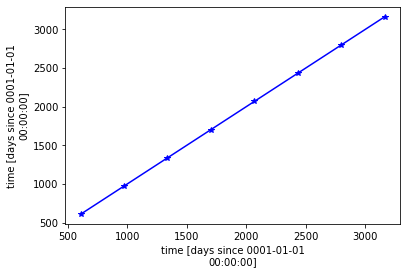

In [16]:
t=[1,2,3,4,5,6,7,8]
t=ds8.time.isel(time=t)
t.plot.line('b-*')

In [ ]:
*.nc'))
#dsJUNE = xr.open_mfdataset((arc + '0*.nc'))

Plot timeseries evolutions of  of maps of fractional quantities (takes up a lot of space so commented it out)

In [ ]:
pb = ds8.PFTbiomass[:,0:6,:,:] 
sumB=np.sum(pb,1)
pb = pb[:,0,:,:]/sumB
pb.attrs['standard_name'] = 'frac indiv PFT1'
#pplot = pb.plot(x='lon', y='lat', col='time', col_wrap=3 ,robust=True)

Plot out timeseries from specific sites. 

In [15]:
lat=ds8.lat
c=lat.isel(lat=[-5, 5],)
print(c)


lats = [22,23]
lons = [56, 57, 58, 60, 61, 62 ]
pft=[0,1,2,3,4,5]

<xarray.DataArray 'lat' (lat: 2)>
array([ 74., -70.], dtype=float32)
Coordinates:
  * lat      (lat) float32 74.0 -70.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north


Biomass: Illustrates eventual dominance of reproductive strategy. PFT1 in blue, PFT2 in orange, etc. (adding legend messes up plot in a way I don't have the python skillz to fix yet)

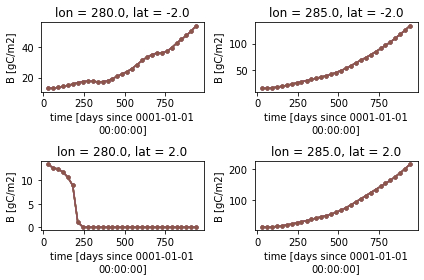

In [38]:
fig, axes = plt.subplots(ncols=2, nrows=2)
t=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
ds8.PFTbiomass.attrs['long_name'] = 'B'
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, marker='.')

plt.tight_layout()
plt.draw()

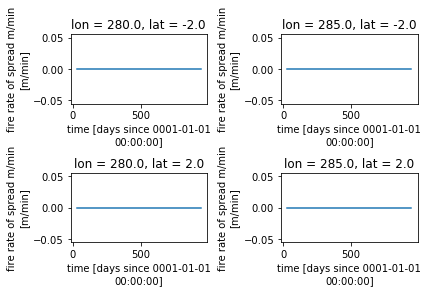

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.FIRE_ROS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.FIRE_ROS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.FIRE_ROS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.FIRE_ROS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Individuals: Huge advantage for smallest PFT 

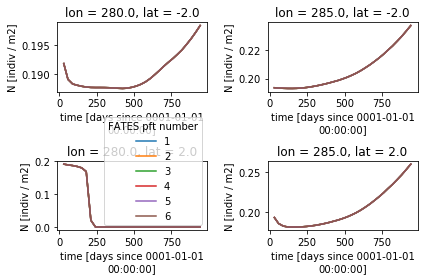

In [34]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.PFTnindivs.attrs['long_name'] = 'N'
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0])
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

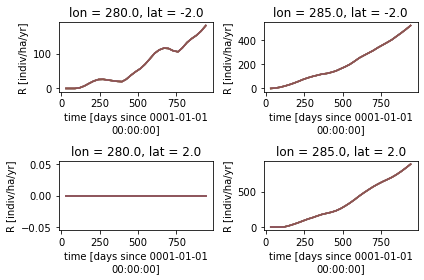

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.RECRUITMENT.attrs['long_name'] = 'R'
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

This is TOTAL mortality, with a corresponding peak in rates. 
Note also the massive numbers here.  They are massively higher than any of the outputs for the different mortality types. 

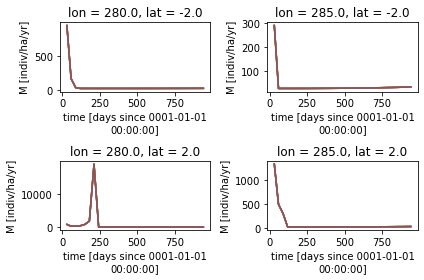

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.MORTALITY.attrs['long_name'] = 'M'
ds8.MORTALITY.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.MORTALITY.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.MORTALITY.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.MORTALITY.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Now plotting out all of the mortality types for our first site above. Only, 1 (background), 2, (C starvation) and 5(termination) are important.
None has the sam magnitude as the total mortality output. Carbon starvation has a similar periodicity to the overall mortality. 

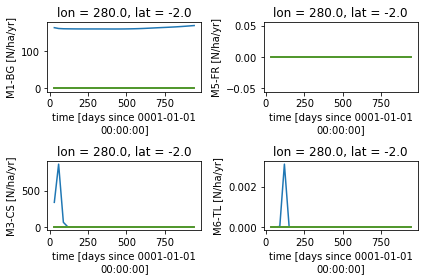

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2]
ds8.M1_SCLS.attrs['long_name'] = 'M1-BG'
ds8.M2_SCLS.attrs['long_name'] = 'M2-HY'
ds8.M3_SCLS.attrs['long_name'] = 'M3-CS'
ds8.M4_SCLS.attrs['long_name'] = 'M4-IM'
ds8.M5_SCLS.attrs['long_name'] = 'M5-FR'
ds8.M6_SCLS.attrs['long_name'] = 'M6-TL'
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.M3_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.M5_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.M6_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()